# House Sales in King County -  ANALYSIS CA1 REPORT PART B Regression

# Importing the relevant libraries for analysis, cleaning and visualisation



In [3]:
#data cleaning and manipulation
import numpy as np 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Scikit learn 
# Encode all non numeric column
from sklearn.preprocessing import LabelEncoder


# Load the dataset

In [4]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# identify data shape, columns name, types and data details for train dataset
## the columns can be identified by the types, the relevant shapes of data set (21613,20)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Date type is object need to convert to date type

In [6]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# DATA CLEANING AND CLEANING OF MISSING DATA

## CHECK DATASET MISSING
### There are no missing data in the dataset

In [7]:
# Count for missing values 
missing_no_data = house_df.isnull()
missing_no_data = missing_no_data.sum()
missing_no_data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Cleanup of date format

In [8]:
house_df['year'] = pd.to_datetime(house_df['date']).dt.year
house_df['month'] = pd.to_datetime(house_df['date']).dt.month
house_df['date'] = pd.to_datetime(house_df[['year', 'month']].assign(DAY=1))
house_df.drop(["month", "year"], inplace=True, axis=1)

In [9]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-01,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-01,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-01,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-01,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-01,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-01,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-01,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-01,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-01,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# ANALYSIS AND DATA EXPLORATION

## Heatmap to identify correlation between price and other factors.
### exploring other variables to find a patterns
key findingsStrong Correlation between price and size of the the sqtft of living room at 0.7

-Strong Correlation between price and grade, higher the grade higher the price at 0.67

Decently strong correlation between price and the average house square footage of the 15 closest neighbors (sqft_living15)s

#### From results below it can be inferred that there is weak correlation between 
##### bedrooms
##### bathrooms, 
##### view,
##### sqft_above,
##### sqft_basement,
##### lat,

#### these columns to be dropped due to super weak correlations (less than 0.1 correlations)
##### date
##### sqft_lot
##### condition
##### yr_built
##### zipcode
##### long
##### sqft_lot15

<Axes: >

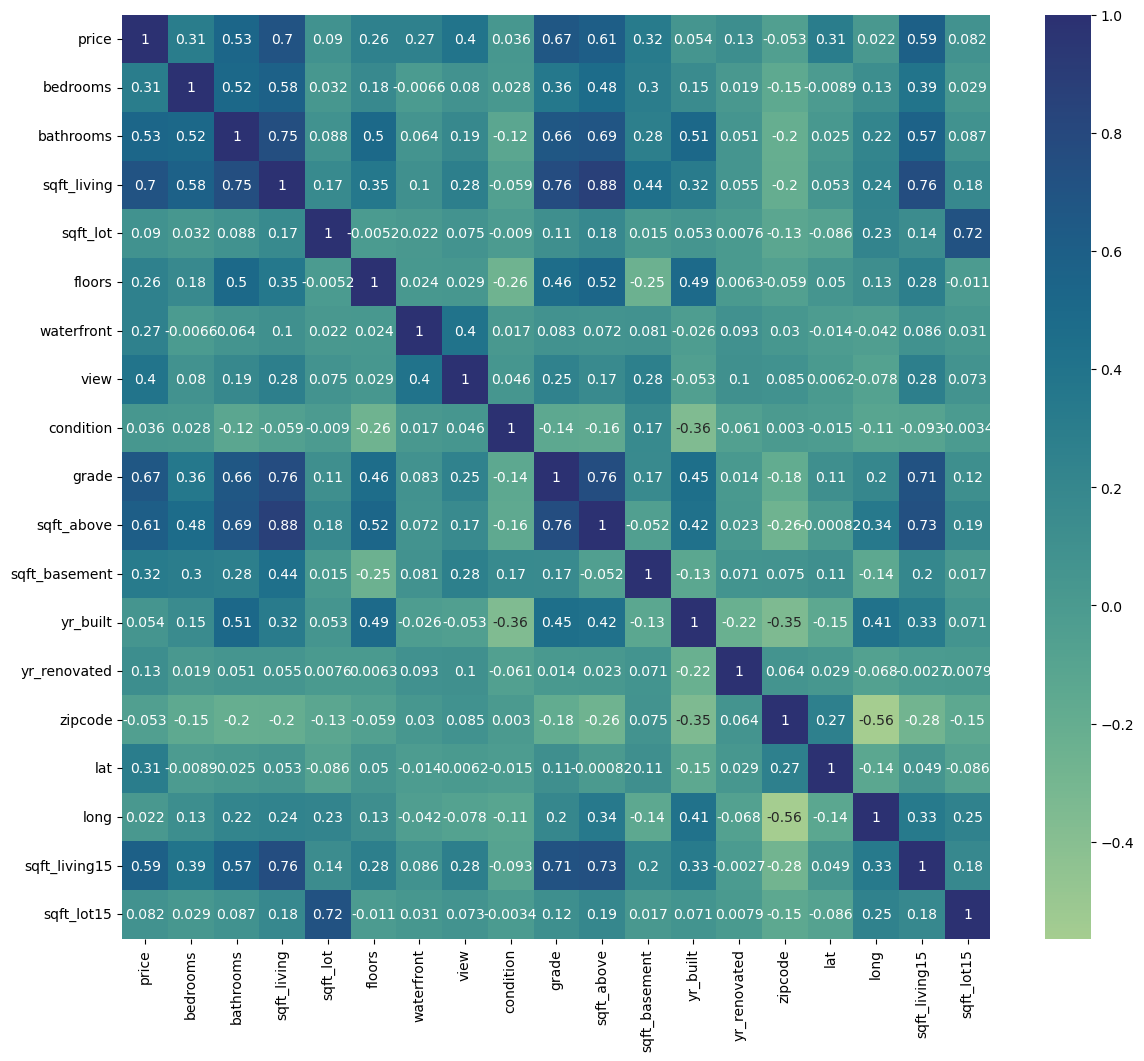

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(house_df[['price', 'bedrooms','bathrooms', 'sqft_living',	'sqft_lot',	'floors', 
                'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement',
                'yr_built',	'yr_renovated',	'zipcode', 'lat', 'long', 'sqft_living15',	
                'sqft_lot15']].corr(), annot=True,cmap="crest")

## Feature selection

### Dropping variables with very weak correlations
#### Dropping columns to analyse on strong correlations variables

In [11]:
kc_house_data_df = house_df.drop(columns=['date','sqft_lot','condition','yr_built','zipcode','long','sqft_lot15'])
kc_house_data_df

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,7129300520,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,6414100192,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,5631500400,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,2487200875,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,1954400510,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,0,47.6993,1530
21609,6600060120,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,0,47.5107,1830
21610,1523300141,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,0,47.5944,1020
21611,291310100,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,0,47.5345,1410


## Encoder to process data

# Modeling and Evaluation

## Splitting data by train and test

In [12]:
# splitting data 
from sklearn.model_selection import train_test_split
X = kc_house_data_df.drop(columns=['price'])
y = kc_house_data_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Classifying by Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)

print(rfg_model.score(X_test, y_test)*100,"%")

81.02284744417685 %


## hyperparameters tuning to improve score

In [14]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [5,20,50,100]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfg_model,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [15]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\chew_\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

## best parameters to adjust to

In [16]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



In [17]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=True) 
randmf.fit( X_train, y_train) 

C:\Users\chew_\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=120, max_features='auto')

	
### Return the coefficient of determination score of the prediction.

In [18]:
print("Score of model =", randmf.score(X_train, y_train)*100, "%")

Score of model = 97.38979339062331 %


In [19]:
from sklearn.metrics import mean_squared_error
y_pred = randmf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

180038.68067424785

C:\Users\chew_\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


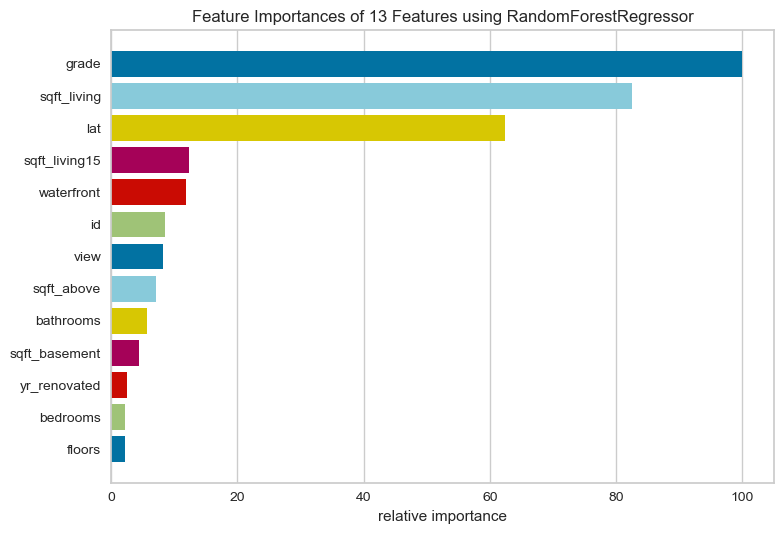

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [27]:
from yellowbrick.model_selection import FeatureImportances


viz = FeatureImportances(randmf)
viz.fit(X, y)
viz.show()